# Diamond Predictions using Various Models

Three models will be evaluated which is Standard Linear Regression, Random Forest Reggressor and K means Regressor.

In [1]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import  LinearRegression, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
#load in the data
df = pd.read_csv('diamonds.csv')

# Exploratory Data Analysis

In [3]:
#Check the head of the data
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [5]:
df.describe()

,Unnamed: 0,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [6]:
df.columns

Index(['Unnamed: 0', 'carat', 'cut', 'color', 'clarity', 'depth', 'table',
       'price', 'x', 'y', 'z'],
      dtype='object')

In [7]:
df.dtypes

Unnamed: 0      int64
carat         float64
cut            object
color          object
clarity        object
depth         float64
table         float64
price           int64
x             float64
y             float64
z             float64
dtype: object

In [8]:
df = df.drop('Unnamed: 0', axis =1)

In [9]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


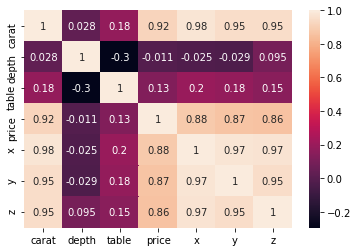

In [10]:
sns.heatmap(df.corr(),annot=True);

# Prepare the data set and work on feature engineering

There is a high amount of correlation between the the diamond dimensions. 
So it might be better to eliminate some of these due to the high amount correlation.

In [11]:
#feature engineering
df['symmetry'] = df['x']/df['y']
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,symmetry
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,0.992462
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,1.013021
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,0.995086
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,0.992908
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,0.997701


In [12]:
df = df.dropna(axis=0)

In [13]:
df_trans=pd.get_dummies(df)
X = df_trans.drop(['price','x','y','z'],axis=1)
y=df_trans['price']
features = X.columns

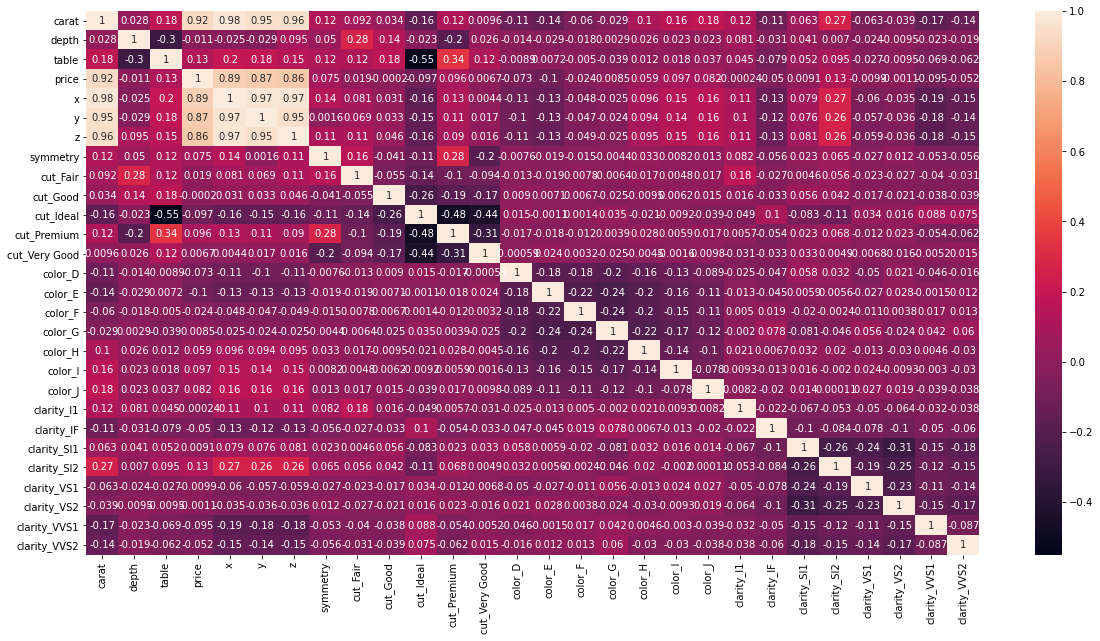

In [14]:
plt.figure(figsize=(20,10))
sns.heatmap(df_trans.corr(),annot=True);

In [15]:
#scale the data
s = StandardScaler()
X = s.fit_transform(X)

In [16]:
X_train,X_test,y_train,y_test = train_test_split(X,y)

# Prediction and Evaluate the Model Performance

In [17]:
models_eval = pd.DataFrame(index=['Null','KNN','MLR'],columns=['RMSE'])


In [18]:
ypred_null = y_train.mean()

# K-Neighbours Regressor

In [19]:
knn = KNeighborsRegressor(n_neighbors=7)
knn.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=7)

In [20]:
y_pred = knn.predict(X_test)


# Random Forrest Regression

In [21]:
rf = RandomForestRegressor(n_estimators=10)
rf.fit(X_train,y_train)
y_pred2=y_pred = rf.predict(X_test)


# Linear Regression

In [22]:
lin = LinearRegression()
lin = lin.fit(X_train,y_train)
y_pred3 = lin.predict(X_test)

# Lasso Regression

In [23]:
lasso = Lasso()
lasso.fit(X_train,y_train)
y_pred4 = lasso.predict(X_test)

In [24]:
model_eval=pd.DataFrame(index=['KNN','MLR'],columns=['RMSE'])
model_eval.loc['KNN','RMSE']=np.sqrt(mean_squared_error(y_test,y_pred))
model_eval.loc['RF','RMSE'] = np.sqrt(mean_squared_error(y_test,y_pred2))
model_eval.loc['MLR','RMSE'] = np.sqrt(mean_squared_error(y_test,y_pred3))
model_eval.loc['Lasso','RMSE'] = np.sqrt(mean_squared_error(y_test,y_pred4))
model_eval.loc['NULL','RMSE'] = ypred_null
model_eval

,RMSE
KNN,576.612
MLR,1185.09
RF,576.612
Lasso,1185.13
NULL,3931.3


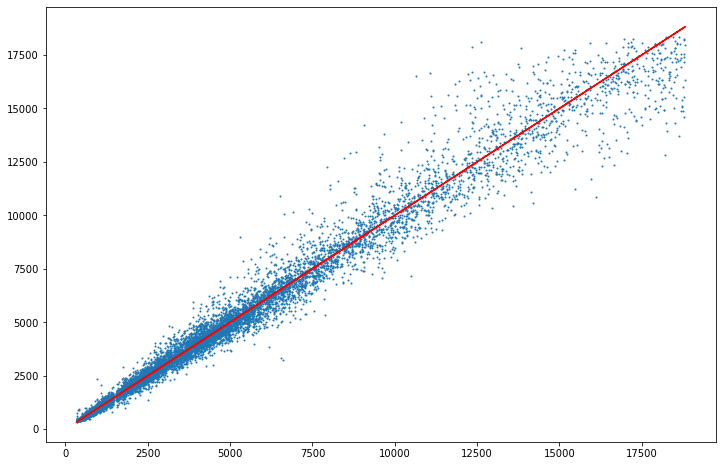

In [25]:
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(y_test,y_pred,s=1)
ax.plot(y_test,y_test,color='red')

<AxesSubplot:xlabel='price'>

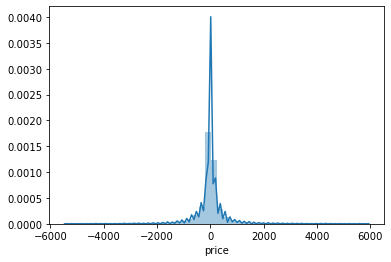

In [26]:
sns.distplot(y_pred-y_test)

In [27]:
lin=LinearRegression()
lin.fit(X_train,y_train)
y_pred2 = lin.predict(X_test)
model_eval.loc['MLR','RMSE']=np.sqrt(mean_squared_error(y_pred2,y_test))

In [28]:
#features importance
from sklearn.ensemble import ExtraTreesRegressor
model =ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [29]:
model.feature_importances_.tolist()

[0.8800028350965831,
 0.004086671129164725,
 0.004798468391552305,
 0.004849533345730631,
 0.0011541164645352375,
 0.0006522059400922406,
 0.0023221883918439225,
 0.0009159794957662318,
 0.0005254621998347622,
 0.003860188678188782,
 0.003552281983400041,
 0.001991942342253363,
 0.003193317774981754,
 0.006187584177106947,
 0.008240953937806751,
 0.009942444180562353,
 0.01500977690678841,
 0.002922760028942585,
 0.012798041488592942,
 0.017273885044105975,
 0.004402178809728998,
 0.005505778411857387,
 0.002603252315661448,
 0.0032081534649192316]